In [1]:
#Importing the necessaary libraries and packages
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
#loading the train and test datasets
car_df=pd.read_csv(r"Used Car Details")


print("Shape of the dataset:", car_df.shape)

Shape of the dataset: (5000, 8)


We can see the dataset has 5000 rows and 8 columns. 

In [4]:
#printing the head of the dataset
car_df.head()

,Unnamed: 0,Brand,Variant,Fuel,Km_driven,Owner,Location,Price
0,0,Honda Amaze (2019),MANUAL,DIESEL,69511.0 KM,1st,"Location\nRTC Colony, Hyderabad","₹ 7,55,000"
1,1,Maruti Suzuki Alto K10 (2018),MANUAL,PETROL,57071.0 KM,1st,"Location\nSindhu Nagar, Bhilwara","₹ 3,30,000"
2,2,Mahindra Bolero Power Plus (2020),MANUAL,DIESEL,67000.0 KM,--,"Location\nPolo Field, Tezpur","₹ 8,65,000"
3,3,Toyota Innova (2008),MANUAL,DIESEL,120000 KM,Second,"Location\nHussaini Alam, Hyderabad","₹ 2,70,000"
4,4,Maruti Suzuki 1000 (1999),MANUAL,PETROL,40000 KM,Second,"Location\nSector 2A, Chandigarh","₹ 50,000"


As we have scraped the data from a site, it means our data is unsupervised and not ready for mahine learning. So, before we move on to make predictions from our data we will have to apply preprocessing techniques to ensure our data is all set for model building and predictions. 

Here we find that the column 'Unnamed: 0' can be dropped as the first one contains the numbers of the rows in the dataset. Thus, we will drop it as it is not necessary for prediction.

In [5]:
#Dropping unimportant column
car_df.drop(['Unnamed: 0'], axis=1, inplace=True)

We have dropped the 'Unnamed: 0' column. And our dataset now looks good!

Let's check the null values in dataset. 

In [6]:
#checking null values
car_df.isnull().sum()

Brand        139
Variant      139
Fuel         139
Km_driven    139
Owner        139
Location     139
Price        139
dtype: int64

In [7]:
#checking the total no. of null values
car_df.isnull().sum().sum()

973

Here we can see that all the columns have equal number of null values present. Thus, we will first drop them and save our dataset in a new dataframe df. 

In [8]:
# drop all rows with any null values
df = car_df.dropna()

In [9]:
#rechecking null values
df.isnull().sum()

Brand        0
Variant      0
Fuel         0
Km_driven    0
Owner        0
Location     0
Price        0
dtype: int64

We have dropped all the null values that our dataset had. While carefully checking the data I also found there are '--' in certain cells. We will replace them with 'NA'. Additionally, in the 'Price' column there are ',' and '₹' sign and the 'Km_driven' column has 'KM'. So, we will try to get rid of them using replace functions.

We will also try to seperate the year from the Brand column.

In [10]:
#Extracting Brand name of the car in a new column Car_brand.
df['Car_brand'] = df['Brand'].apply(lambda x:x.split('(')[0])

In [11]:
#Dropping the original column brand
df = df.drop('Brand',axis=1)

In [12]:
#checking the result
df

,Variant,Fuel,Km_driven,Owner,Location,Price,Car_brand
0,MANUAL,DIESEL,69511.0 KM,1st,"Location\nRTC Colony, Hyderabad","₹ 7,55,000",Honda Amaze
1,MANUAL,PETROL,57071.0 KM,1st,"Location\nSindhu Nagar, Bhilwara","₹ 3,30,000",Maruti Suzuki Alto K10
2,MANUAL,DIESEL,67000.0 KM,--,"Location\nPolo Field, Tezpur","₹ 8,65,000",Mahindra Bolero Power Plus
3,MANUAL,DIESEL,120000 KM,Second,"Location\nHussaini Alam, Hyderabad","₹ 2,70,000",Toyota Innova
4,MANUAL,PETROL,40000 KM,Second,"Location\nSector 2A, Chandigarh","₹ 50,000",Maruti Suzuki 1000
...,...,...,...,...,...,...,...
4995,MANUAL,PETROL,"99,000 KM",2nd,"Location\nBenachiti, Durgapur","₹ 3,49,999",Hyundai Verna
4996,MANUAL,DIESEL,35000.0 KM,2nd,"Location\nKailash Nagar, Mumbai","₹ 8,99,000",Hyundai Creta
4997,MANUAL,DIESEL,126000.0 KM,1st,"Location\nKukatpally, Hyderabad","₹ 4,38,000",Hyundai Fluidic Verna
4998,MANUAL,DIESEL,61000.0 KM,1st,"Location\nThane West, Thane","₹ 5,99,000",Hyundai Verna


In [13]:
#replace all the  '--' with 'NA'
df= df.replace('--', 'NA')

In [14]:
#replacing ',' and '₹' sign with blank in price column and converting the same into integer to make our dataset ready for prediction
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].astype(int)

In [15]:
#replacing ',' and 'KM' sign with blank in price column 
df['Km_driven'] = df['Km_driven'].str.replace(',', '')
df['Km_driven'] = df['Km_driven'].str.replace('KM', '')

We observe the 'Owner' column has certain cells that are mentioned as First, Second, Third, Fourth contrary to the usual 1st, 2nd, 3rd, etc. We will thus replace them with the latter values. 

In [16]:
df['Owner'] = df['Owner'].replace('First', '1st')

In [17]:
df['Owner'] = df['Owner'].replace('Second', '2nd')

In [18]:
df['Owner'] = df['Owner'].replace('Third', '3rd')

In [19]:
df['Owner'] = df['Owner'].replace('Fourth', '4th')

In [20]:
df['Owner'] = df['Owner'].replace('NA', '4th')

We can see that there are certain cells that have '--' inplace of values, which we will try to replace with 0. 

In [21]:
df1=df.fillna(0)

In [22]:
df1['Km_driven']=df1['Km_driven'].apply(lambda x: x.replace(',','') if x!='-' else '-')

In [23]:
df1['Km_driven'] = df1['Km_driven'].replace('--', '0')

In [24]:
df1['Km_driven'] = df1['Km_driven'].fillna('0')

In [25]:
df1

,Variant,Fuel,Km_driven,Owner,Location,Price,Car_brand
0,MANUAL,DIESEL,69511.0,1st,"Location\nRTC Colony, Hyderabad",755000,Honda Amaze
1,MANUAL,PETROL,57071.0,1st,"Location\nSindhu Nagar, Bhilwara",330000,Maruti Suzuki Alto K10
2,MANUAL,DIESEL,67000.0,4th,"Location\nPolo Field, Tezpur",865000,Mahindra Bolero Power Plus
3,MANUAL,DIESEL,120000,2nd,"Location\nHussaini Alam, Hyderabad",270000,Toyota Innova
4,MANUAL,PETROL,40000,2nd,"Location\nSector 2A, Chandigarh",50000,Maruti Suzuki 1000
...,...,...,...,...,...,...,...
4995,MANUAL,PETROL,99000,2nd,"Location\nBenachiti, Durgapur",349999,Hyundai Verna
4996,MANUAL,DIESEL,35000.0,2nd,"Location\nKailash Nagar, Mumbai",899000,Hyundai Creta
4997,MANUAL,DIESEL,126000.0,1st,"Location\nKukatpally, Hyderabad",438000,Hyundai Fluidic Verna
4998,MANUAL,DIESEL,61000.0,1st,"Location\nThane West, Thane",599000,Hyundai Verna


We will now convert the object type 'Km_driven' column into numeric type as it contains numeric values. 

In [26]:
df_final = df1.replace('--', '0')

In [27]:
#checking data types
df_final.dtypes

Variant      object
Fuel         object
Km_driven    object
Owner        object
Location     object
Price         int32
Car_brand    object
dtype: object

Now, we can split the dataset into categorical and numerical and proceed with visualization. 

In [28]:
categorical_cols = df_final.select_dtypes(include = ['object'])

categorical_cols.head()

,Variant,Fuel,Km_driven,Owner,Location,Car_brand
0,MANUAL,DIESEL,69511.0,1st,"Location\nRTC Colony, Hyderabad",Honda Amaze
1,MANUAL,PETROL,57071.0,1st,"Location\nSindhu Nagar, Bhilwara",Maruti Suzuki Alto K10
2,MANUAL,DIESEL,67000.0,4th,"Location\nPolo Field, Tezpur",Mahindra Bolero Power Plus
3,MANUAL,DIESEL,120000,2nd,"Location\nHussaini Alam, Hyderabad",Toyota Innova
4,MANUAL,PETROL,40000,2nd,"Location\nSector 2A, Chandigarh",Maruti Suzuki 1000


In [29]:
numerical_cols = df_final.select_dtypes(include = ['int'])

numerical_cols.head()

,Price
0,755000
1,330000
2,865000
3,270000
4,50000


In [30]:
numerical_cols['Price'].describe()

count    4.861000e+03
mean     8.696927e+05
std      1.366803e+06
min      5.000000e+04
25%      2.100000e+05
50%      4.750000e+05
75%      8.100000e+05
max      7.500000e+06
Name: Price, dtype: float64

Let's count the no. of cars based on their brand, variant, owner, fuel type, etc.

In [31]:
# Brand type
df_final['Car_brand'].value_counts()

Hyundai Santro Xing            373
Volkswagen Polo                250
Hyundai Verna                  249
Maruti Suzuki 800              249
Hyundai Creta                  249
Honda Amaze                    247
Ford Figo                      125
Maruti Suzuki Swift            125
Toyota Etios Liva              125
Honda Accord                   125
Mahindra Rexton                125
Honda City                     125
Nissan Micra                   125
Hyundai I10                    125
Maruti Suzuki Alto K10         125
Volkswagen Vento               125
Maruti Suzuki Ciaz             125
Toyota Etios                   125
Maruti Suzuki Alto 800         125
Mercedes-Benz Gle Class        125
Bmw 5 Series                   125
Bmw M2                         125
Skoda Superb                   125
Maruti Suzuki 1000             125
Toyota Innova                  125
Mahindra Bolero Power Plus     125
Tata Sumo                      124
Maruti Suzuki Baleno           124
Kia Seltos          

In [32]:
# fuel type - Car fuel type i.e petrol, diesel, cng & hybrids
df_final['Fuel'].value_counts()

PETROL           2494
DIESEL           2117
CNG & HYBRIDS     125
CNG               125
Name: Fuel, dtype: int64

In [33]:
#replacing the CNG with CNG & Hybrids
df_final['Fuel'] = df['Fuel'].str.replace('CNG & HYBRIDS', 'CNG')

In [34]:
df_final['Fuel'].value_counts()

PETROL    2494
DIESEL    2117
CNG        250
Name: Fuel, dtype: int64

In [35]:
# variant type - Car variant type i.e manual, automatic
df_final['Variant'].value_counts()

MANUAL       3240
AUTOMATIC     998
NA            623
Name: Variant, dtype: int64

In [36]:
#replacing the NA with Manual
df_final['Variant'] = df['Variant'].str.replace('NA', 'MANUAL')

In [37]:
df_final['Variant'].value_counts()

MANUAL       3863
AUTOMATIC     998
Name: Variant, dtype: int64

In [38]:
# owner type 
df_final['Owner'].value_counts()

1st    2493
2nd    1495
3rd     375
4th     250
4+      248
Name: Owner, dtype: int64

Visualization

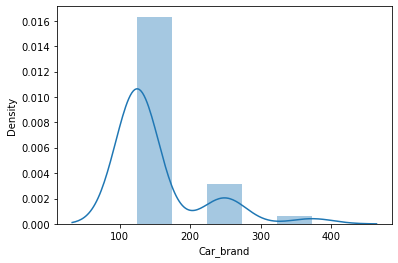

In [39]:
sns.distplot(df_final['Car_brand'].value_counts())
plt.show()

Here we can see as per the Car Brand count Hyundai Santro xing is the most available followed by Volkswagen Polo, Hyundai Verna, etc. Tata sumo, Maruti Suzuki Baleno, Kia Seltos, Hyundai Venue, Hyundai Fluidic Verna, Audi A6 has the least count. 

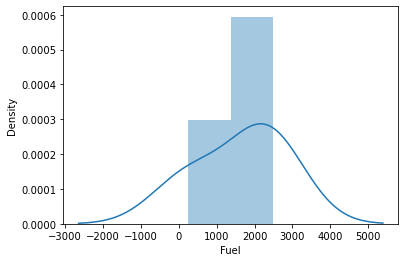

In [40]:
sns.distplot(df_final['Fuel'].value_counts())
plt.show()

We can see Petrol cars are mostly available followed by diesel and CNG. 

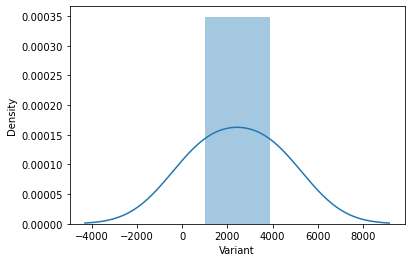

In [41]:
sns.distplot(df_final['Variant'].value_counts())
plt.show()

We can see more manual cars available followed by automatic. 

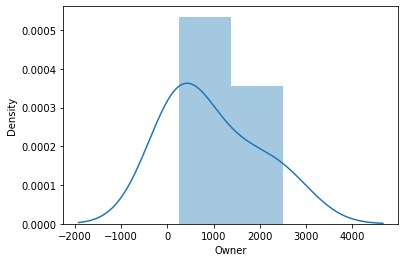

In [42]:
sns.distplot(df_final['Owner'].value_counts())
plt.show()

The cars are mostly sold by first and second owners. 

Text(0.5, 1.0, 'Car Price Distribution Plot')

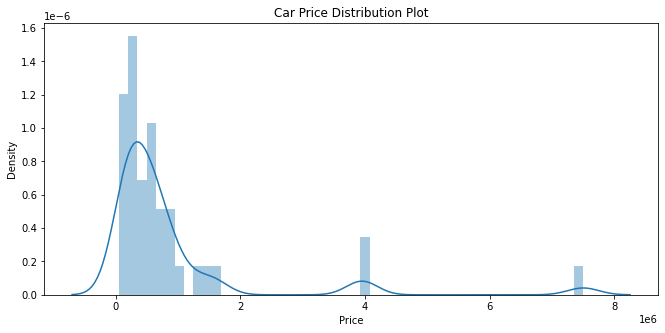

In [43]:
plt.figure(figsize=[11,5])
sns.distplot(df_final['Price'])
plt.title('Car Price Distribution Plot')

This plot shows the distribution of the target feature ‘Price’. We can definitely say that the cost of used cars is definitely high as we see some cars priced at Rs. 3300000 or above. 

Applying Label Encoder in the categorical columns to prepare for training and testing

In [44]:
#Taking care of categorical columns using label encoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in df_final.columns:
    if df_final[i].dtypes=="object":
        df_final[i]=le.fit_transform(df_final[i])

In [45]:
df_final

,Variant,Fuel,Km_driven,Owner,Location,Price,Car_brand
0,1,1,25,0,29,755000,5
1,1,2,19,0,31,330000,19
2,1,1,23,4,26,865000,14
3,1,1,1,1,14,270000,29
4,1,2,13,1,30,50000,16
...,...,...,...,...,...,...,...
4995,1,2,33,1,2,349999,12
4996,1,1,12,1,16,899000,7
4997,1,1,3,0,19,438000,8
4998,1,1,20,0,32,599000,12


# Checking Outliers

In [46]:
# Here, the outliers are situated around the higher prices (right side of the graph)
# we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how ₹300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df_final['Price'].quantile(0.99)

# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df_final[df_final['Price']<q]

Text(0.5, 1.0, 'Car Price Distribution Plot')

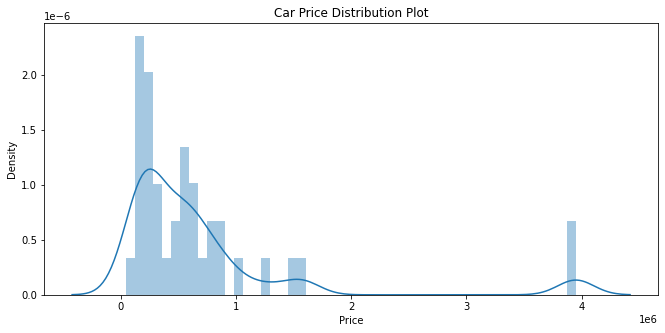

In [47]:
plt.figure(figsize=[11,5])
sns.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

Let's check the linearity using a scatter plot

<AxesSubplot:title={'center':'Price and Owner'}, xlabel='Owner', ylabel='Price'>

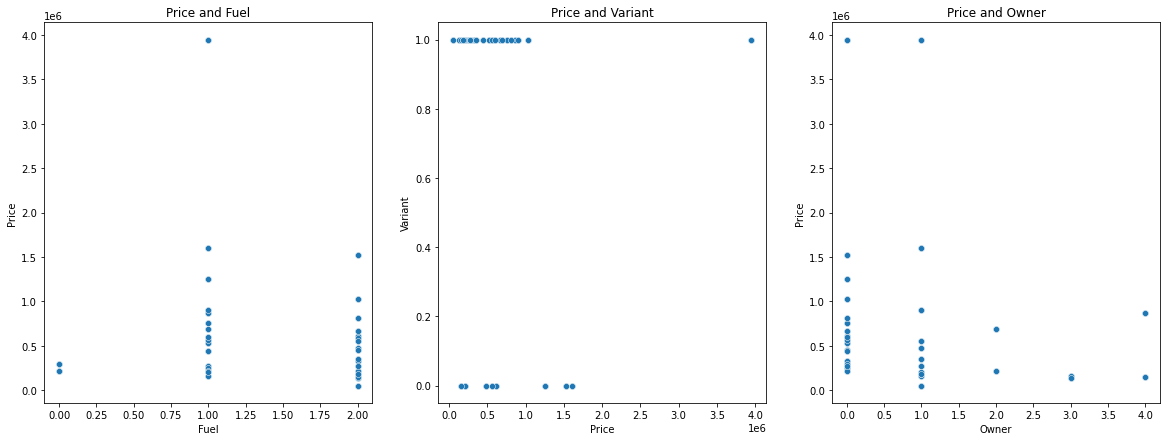

In [48]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Fuel")
sns.scatterplot(x='Fuel',y='Price',data=data_1)

plt.subplot(1,3,2)
plt.title("Price and Variant")
sns.scatterplot(x='Price',y='Variant',data=data_1)

plt.subplot(1,3,3)
plt.title("Price and Owner")
sns.scatterplot(y='Price',x='Owner',data=data_1)


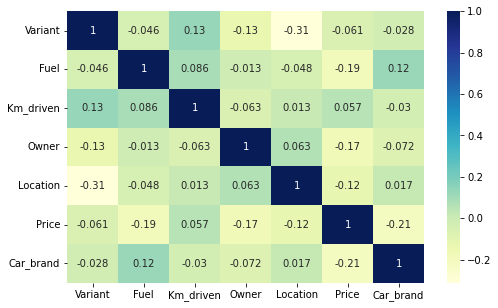

In [49]:
plt.figure(figsize = (8,5))
sns.heatmap(data_1.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

We have used a heatmap to understand the correlation of the data. 

Price is highly (positively) correlated with km driven.

Price is negatively correlated to car brand, variant, owner, fuel, location, etc.

This suggest that cars may fall in the 'economy' cars category, and are priced lower.


<AxesSubplot:xlabel='Owner', ylabel='Price'>

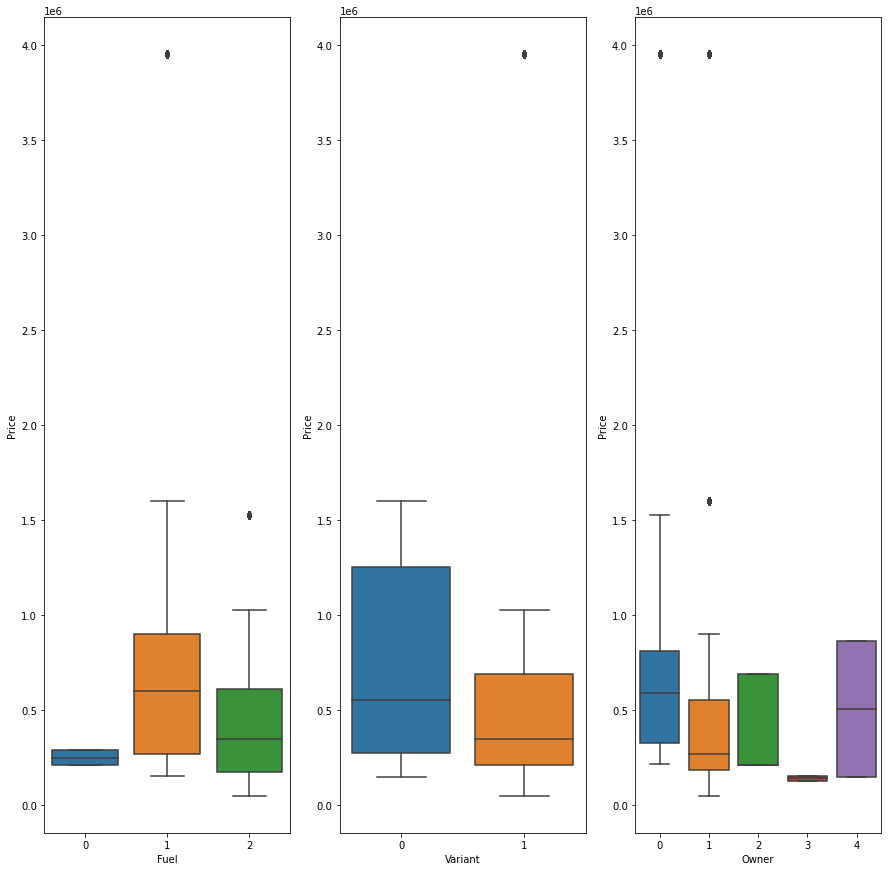

In [50]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
sns.boxplot(x = 'Fuel', y = 'Price', data = data_1)
plt.subplot(1,3,2)
sns.boxplot(x = 'Variant', y = 'Price', data = data_1)
plt.subplot(1,3,3)
sns.boxplot(x = 'Owner', y = 'Price', data = data_1)


The above plots show a relation between car fuel, variant, owner vs price. 

<AxesSubplot:xlabel='Km_driven', ylabel='Price'>

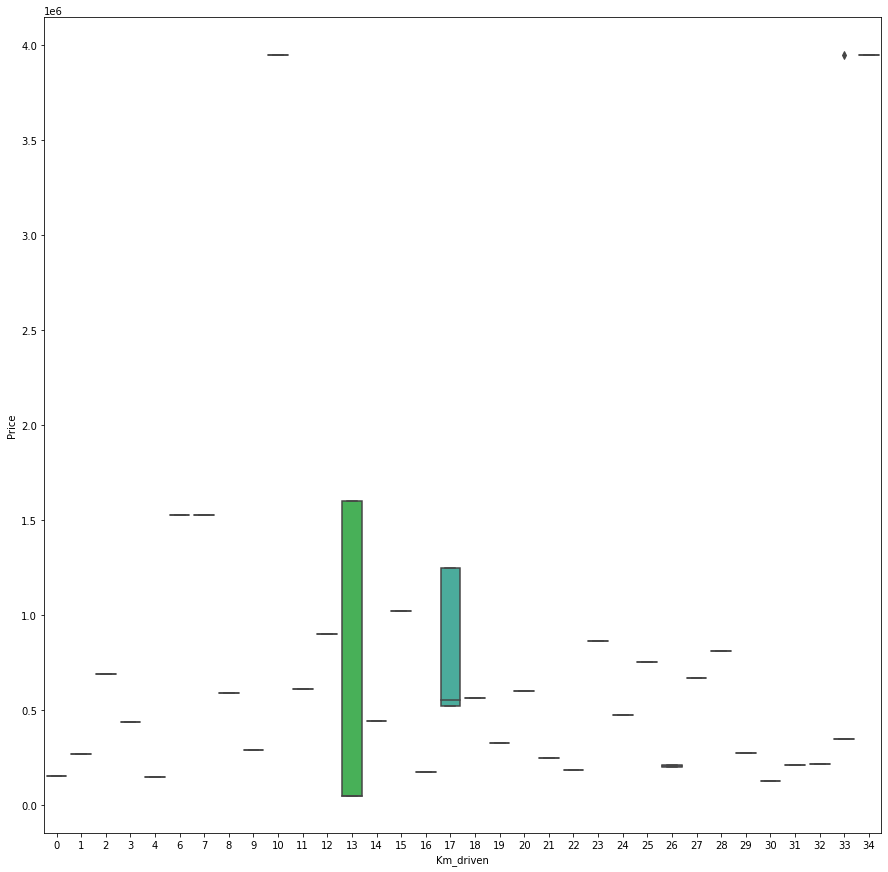

In [51]:
plt.figure(figsize = (15,15))
sns.boxplot(x = 'Km_driven', y = 'Price', data = data_1)


<AxesSubplot:xlabel='Car_brand', ylabel='Price'>

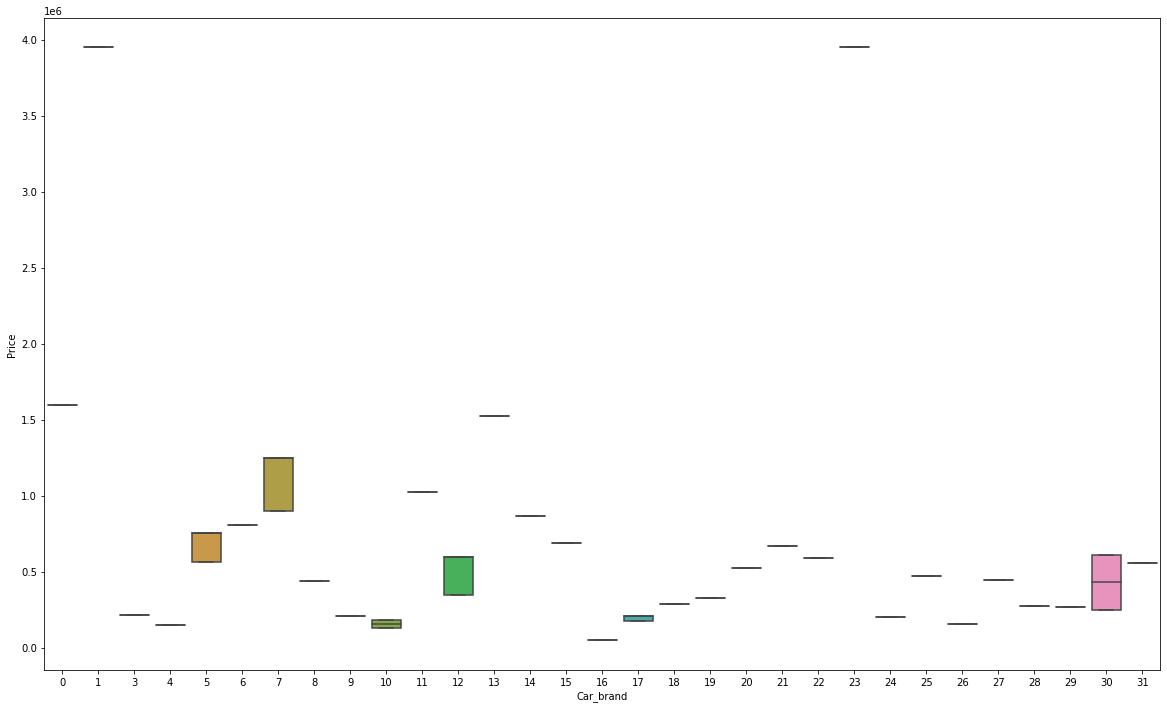

In [52]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'Car_brand', y = 'Price', data = data_1)

Spliting the data into test and train

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [54]:
df_train, df_test = train_test_split(df_final, train_size = 0.7, test_size = 0.3, random_state = 100)

In [55]:
df_train.shape

(3402, 7)

In [56]:
df_test.shape

(1459, 7)

Rescaling the data:

In [57]:
numerical_cols.columns


Index(['Price'], dtype='object')

In [58]:
col_list = ['Price']

In [59]:
scaler = StandardScaler()

In [60]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [61]:
df_train.describe()

,Variant,Fuel,Km_driven,Owner,Location,Price,Car_brand
count,3402.000000,3402.000000,3402.000000,3402.000000,3402.000000,3.402000e+03,3402.000000
mean,0.796590,1.456790,17.098471,0.820988,16.327160,2.346415e-17,15.239565
std,0.402594,0.597984,9.936434,1.102239,10.003364,1.000147e+00,9.004846
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.920512e-01,0.000000
25%,1.000000,1.000000,9.000000,0.000000,8.000000,-4.732562e-01,8.000000
50%,1.000000,2.000000,17.000000,0.000000,16.000000,-2.987759e-01,14.000000
75%,1.000000,2.000000,26.000000,1.000000,25.000000,-6.861050e-02,23.000000
max,1.000000,2.000000,34.000000,4.000000,34.000000,4.939344e+00,31.000000


Model building:

In [62]:
y_train = df_train.pop('Price')
X_train = df_train

Model building using RFE

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Variant', True, 1),
 ('Fuel', True, 1),
 ('Km_driven', True, 1),
 ('Owner', True, 1),
 ('Location', True, 1),
 ('Car_brand', True, 1)]

In [65]:
cols = X_train.columns[rfe.support_]
cols

Index(['Variant', 'Fuel', 'Km_driven', 'Owner', 'Location', 'Car_brand'], dtype='object')

Model 1:

In [66]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [67]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          1.16e-128
Time:                        08:07:39   Log-Likelihood:                -4521.4
No. Observations:                3402   AIC:                             9057.
Df Residuals:                    3395   BIC:                             9100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1737      0.075     15.554      0.0

All the p- values are significant. Let us check VIF.

In [68]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,Features,VIF
1,Fuel,5.11
2,Km_driven,3.77
0,Variant,3.74
5,Car_brand,3.51
4,Location,3.09
3,Owner,1.50


We see that there are a few variables which have an infinite/large VIF. These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. So let's try and build a model with 10 features this time using RFE

Building the model with 10 variables:

In [69]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [70]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('Variant', True, 1),
 ('Fuel', True, 1),
 ('Km_driven', True, 1),
 ('Owner', True, 1),
 ('Location', True, 1),
 ('Car_brand', True, 1)]

In [71]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols 

Index(['Variant', 'Fuel', 'Km_driven', 'Owner', 'Location', 'Car_brand'], dtype='object')

Model 2:

In [72]:
X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [73]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     111.4
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          1.16e-128
Time:                        08:07:40   Log-Likelihood:                -4521.4
No. Observations:                3402   AIC:                             9057.
Df Residuals:                    3395   BIC:                             9100.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1737      0.075     15.554      0.0

Model looks fine. Let us check the vif.

In [74]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Fuel,5.11
2,Km_driven,3.77
0,Variant,3.74
5,Car_brand,3.51
4,Location,3.09
3,Owner,1.50


As we see, still there are columns with high VIF.Let us drop column Fuel.


Model 3:

In [75]:
X3 = X2.drop(['Fuel'], axis =1)
X3_sm = sm.add_constant(X3)

Model_3 = sm.OLS(y_train,X3_sm).fit()

In [76]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          1.34e-129
Time:                        08:07:41   Log-Likelihood:                -4521.8
No. Observations:                3402   AIC:                             9056.
Df Residuals:                    3396   BIC:                             9092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2068      0.064     18.807      0.0

In [77]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,Km_driven,3.57
0,Variant,3.25
4,Car_brand,3.18
3,Location,2.91
2,Owner,1.48


Let us drop column -Variant.

Model 4:

In [78]:
X4 = X3.drop(['Variant'], axis =1)
X4_sm = sm.add_constant(X4)

Model_4 = sm.OLS(y_train,X4_sm).fit()

In [79]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     163.3
Date:                Sat, 17 Sep 2022   Prob (F-statistic):          5.52e-128
Time:                        08:07:41   Log-Likelihood:                -4528.2
No. Observations:                3402   AIC:                             9066.
Df Residuals:                    3397   BIC:                             9097.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0570      0.049     21.740      0.0

In [80]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,Location,2.90
3,Car_brand,2.82
0,Km_driven,2.80
1,Owner,1.47


Residual analysis:

In [81]:
y_train_pred = Model_4.predict(X4_sm)
y_train_pred.head()

1720    0.224633
2037    0.499007
3604   -0.204362
344    -0.464788
2567    0.820762
dtype: float64

In [82]:
Residual = y_train- y_train_pred

<AxesSubplot:ylabel='Density'>

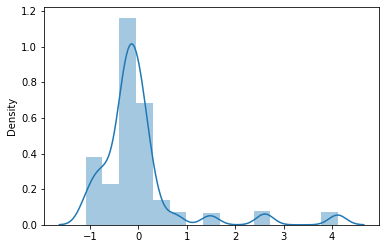

In [83]:
sns.distplot(Residual, bins =15)

Error term is normally distributed.

Making Predictions:

In [84]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [85]:
y_test = df_test.pop('Price')
X_test = df_test

In [86]:
final_cols = X4.columns

In [87]:
X_test_model4= X_test[final_cols]
X_test_model4.head()

,Km_driven,Owner,Location,Car_brand
3564,13,1,30,16
4117,3,0,19,8
2757,3,0,19,8
2264,26,1,20,24
4561,19,0,31,19


In [88]:
X_test_sm = sm.add_constant(X_test_model4)

In [89]:
y_pred = Model_4.predict(X_test_sm)

In [90]:
y_pred.head()

3564   -0.204362
4117    0.499007
2757    0.499007
2264   -0.464788
4561   -0.197555
dtype: float64

Text(0, 0.5, 'y_pred')

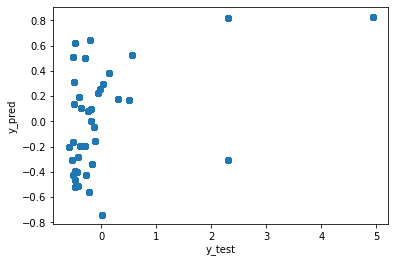

In [91]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Though the model is doing good at the beginning, still there are few high values which model is not able to explain.

Evaluation:

In [92]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.20940264718450252

# Which variables are significant in predicting the price of a car?

We can see that our models indicated fuel, car brand, km driven are important parameters that can affect the price of a car. 